<a href="https://colab.research.google.com/github/Durgaprasad34/bank_churn_prediction/blob/main/bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
%matplotlib inline

# Seaborn
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [6]:
# Read the excel data
custDf = pd.read_csv("/content/bank.csv")
custDf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
custDf = custDf.drop(['RowNumber','CustomerId','Surname'],axis=1)
custDf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Shape and size of the dataset
custDf.shape


(10000, 11)

In [9]:
# Check for null values if any
custDf.isnull().any()

,0
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False
HasCrCard,False
IsActiveMember,False
EstimatedSalary,False


In [10]:
# unique values
custDf.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [11]:
# Data types
custDf.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [12]:
# 5 point summary of data
custDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [13]:
# is there any duplicates
custDf.duplicated().sum()

0

In [16]:
# Get a list of numerical columns
numerical_cols = custDf.select_dtypes(include=np.number).columns

# Calculate the mean only for numerical columns
custDf.groupby(["Exited"])[numerical_cols].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0


<Axes: xlabel='Exited'>

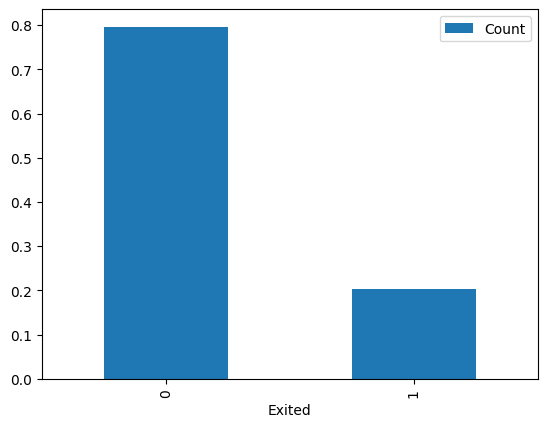

In [17]:
churnCtDf = custDf.groupby(['Exited']).size().reset_index(name='Count')
churnCtDf['Count'] = churnCtDf['Count']/churnCtDf['Count'].sum()
churnCtDf.plot(x='Exited',y='Count',kind='bar')

<Axes: xlabel='NumOfProducts', ylabel='count'>

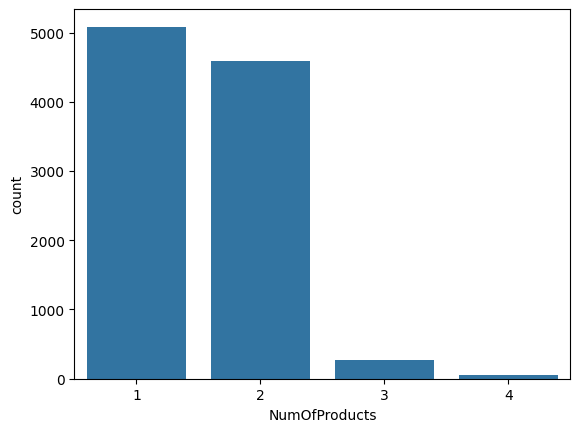

In [18]:
sns.countplot(x='NumOfProducts',data=custDf)

<Axes: xlabel='IsActiveMember', ylabel='count'>

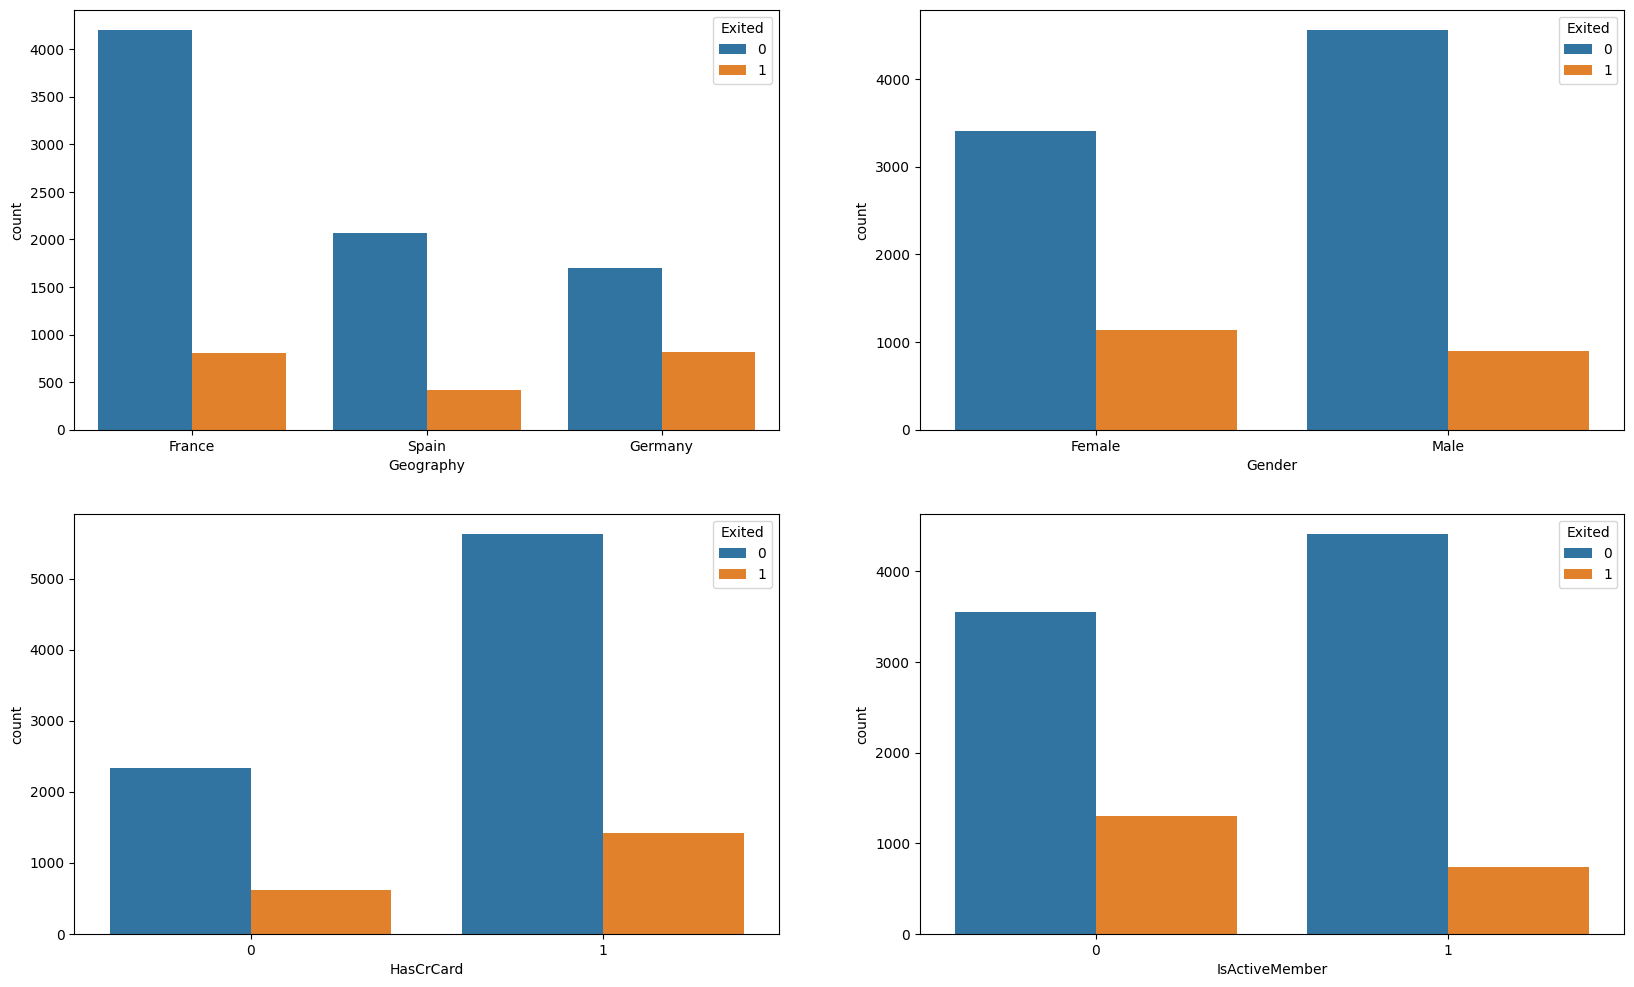

In [19]:
fix,axarr = plot.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography', hue = 'Exited',data = custDf, ax = axarr[0,0])
sns.countplot(x='Gender',    hue = 'Exited',data = custDf, ax = axarr[0,1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = custDf, ax = axarr[1,0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = custDf, ax = axarr[1,1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

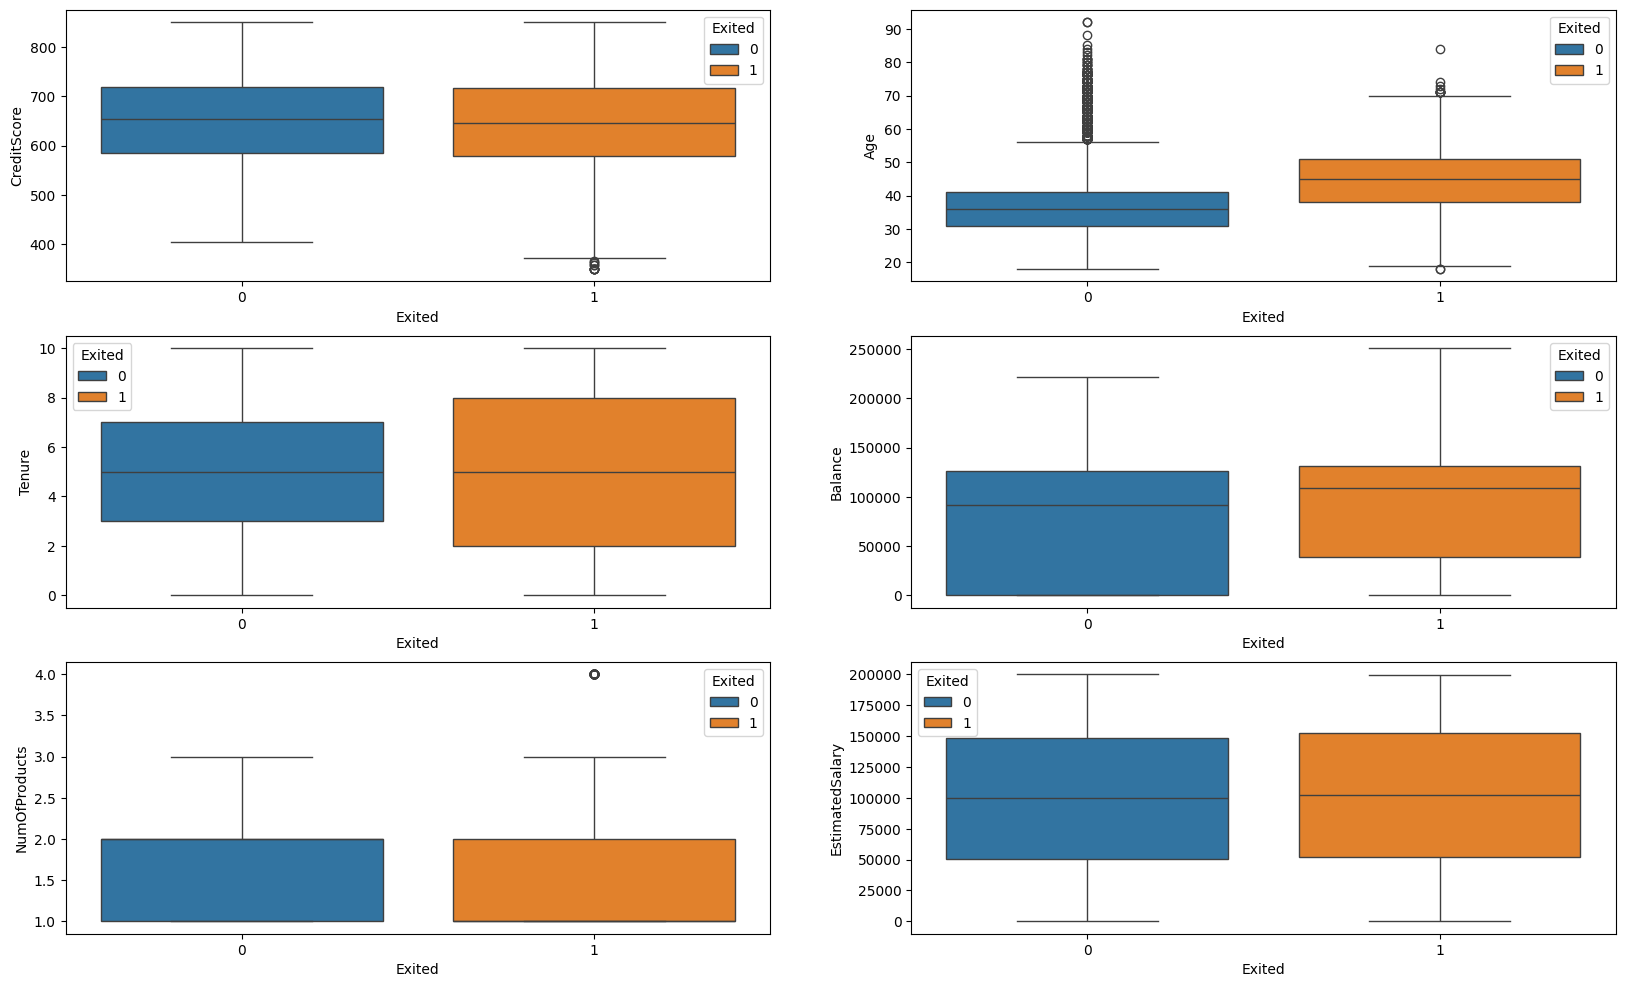

In [20]:
fix,axarr = plot.subplots(3,2, figsize=(20,12))
sns.boxplot(x='Exited', y = 'CreditScore', hue = 'Exited',data = custDf, ax = axarr[0,0])
sns.boxplot(x='Exited', y = 'Age', hue = 'Exited',data = custDf, ax = axarr[0,1])
sns.boxplot(x='Exited', y = 'Tenure', hue = 'Exited',data = custDf, ax = axarr[1,0])
sns.boxplot(x='Exited', y = 'Balance', hue = 'Exited',data = custDf, ax = axarr[1,1])
sns.boxplot(x='Exited', y = 'NumOfProducts', hue = 'Exited',data = custDf, ax = axarr[2,0])
sns.boxplot(x='Exited', y = 'EstimatedSalary', hue = 'Exited',data = custDf, ax = axarr[2,1])

In [21]:
# Convert all the categorical variables to dummy variables
custDf = pd.get_dummies(custDf)
custDf

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


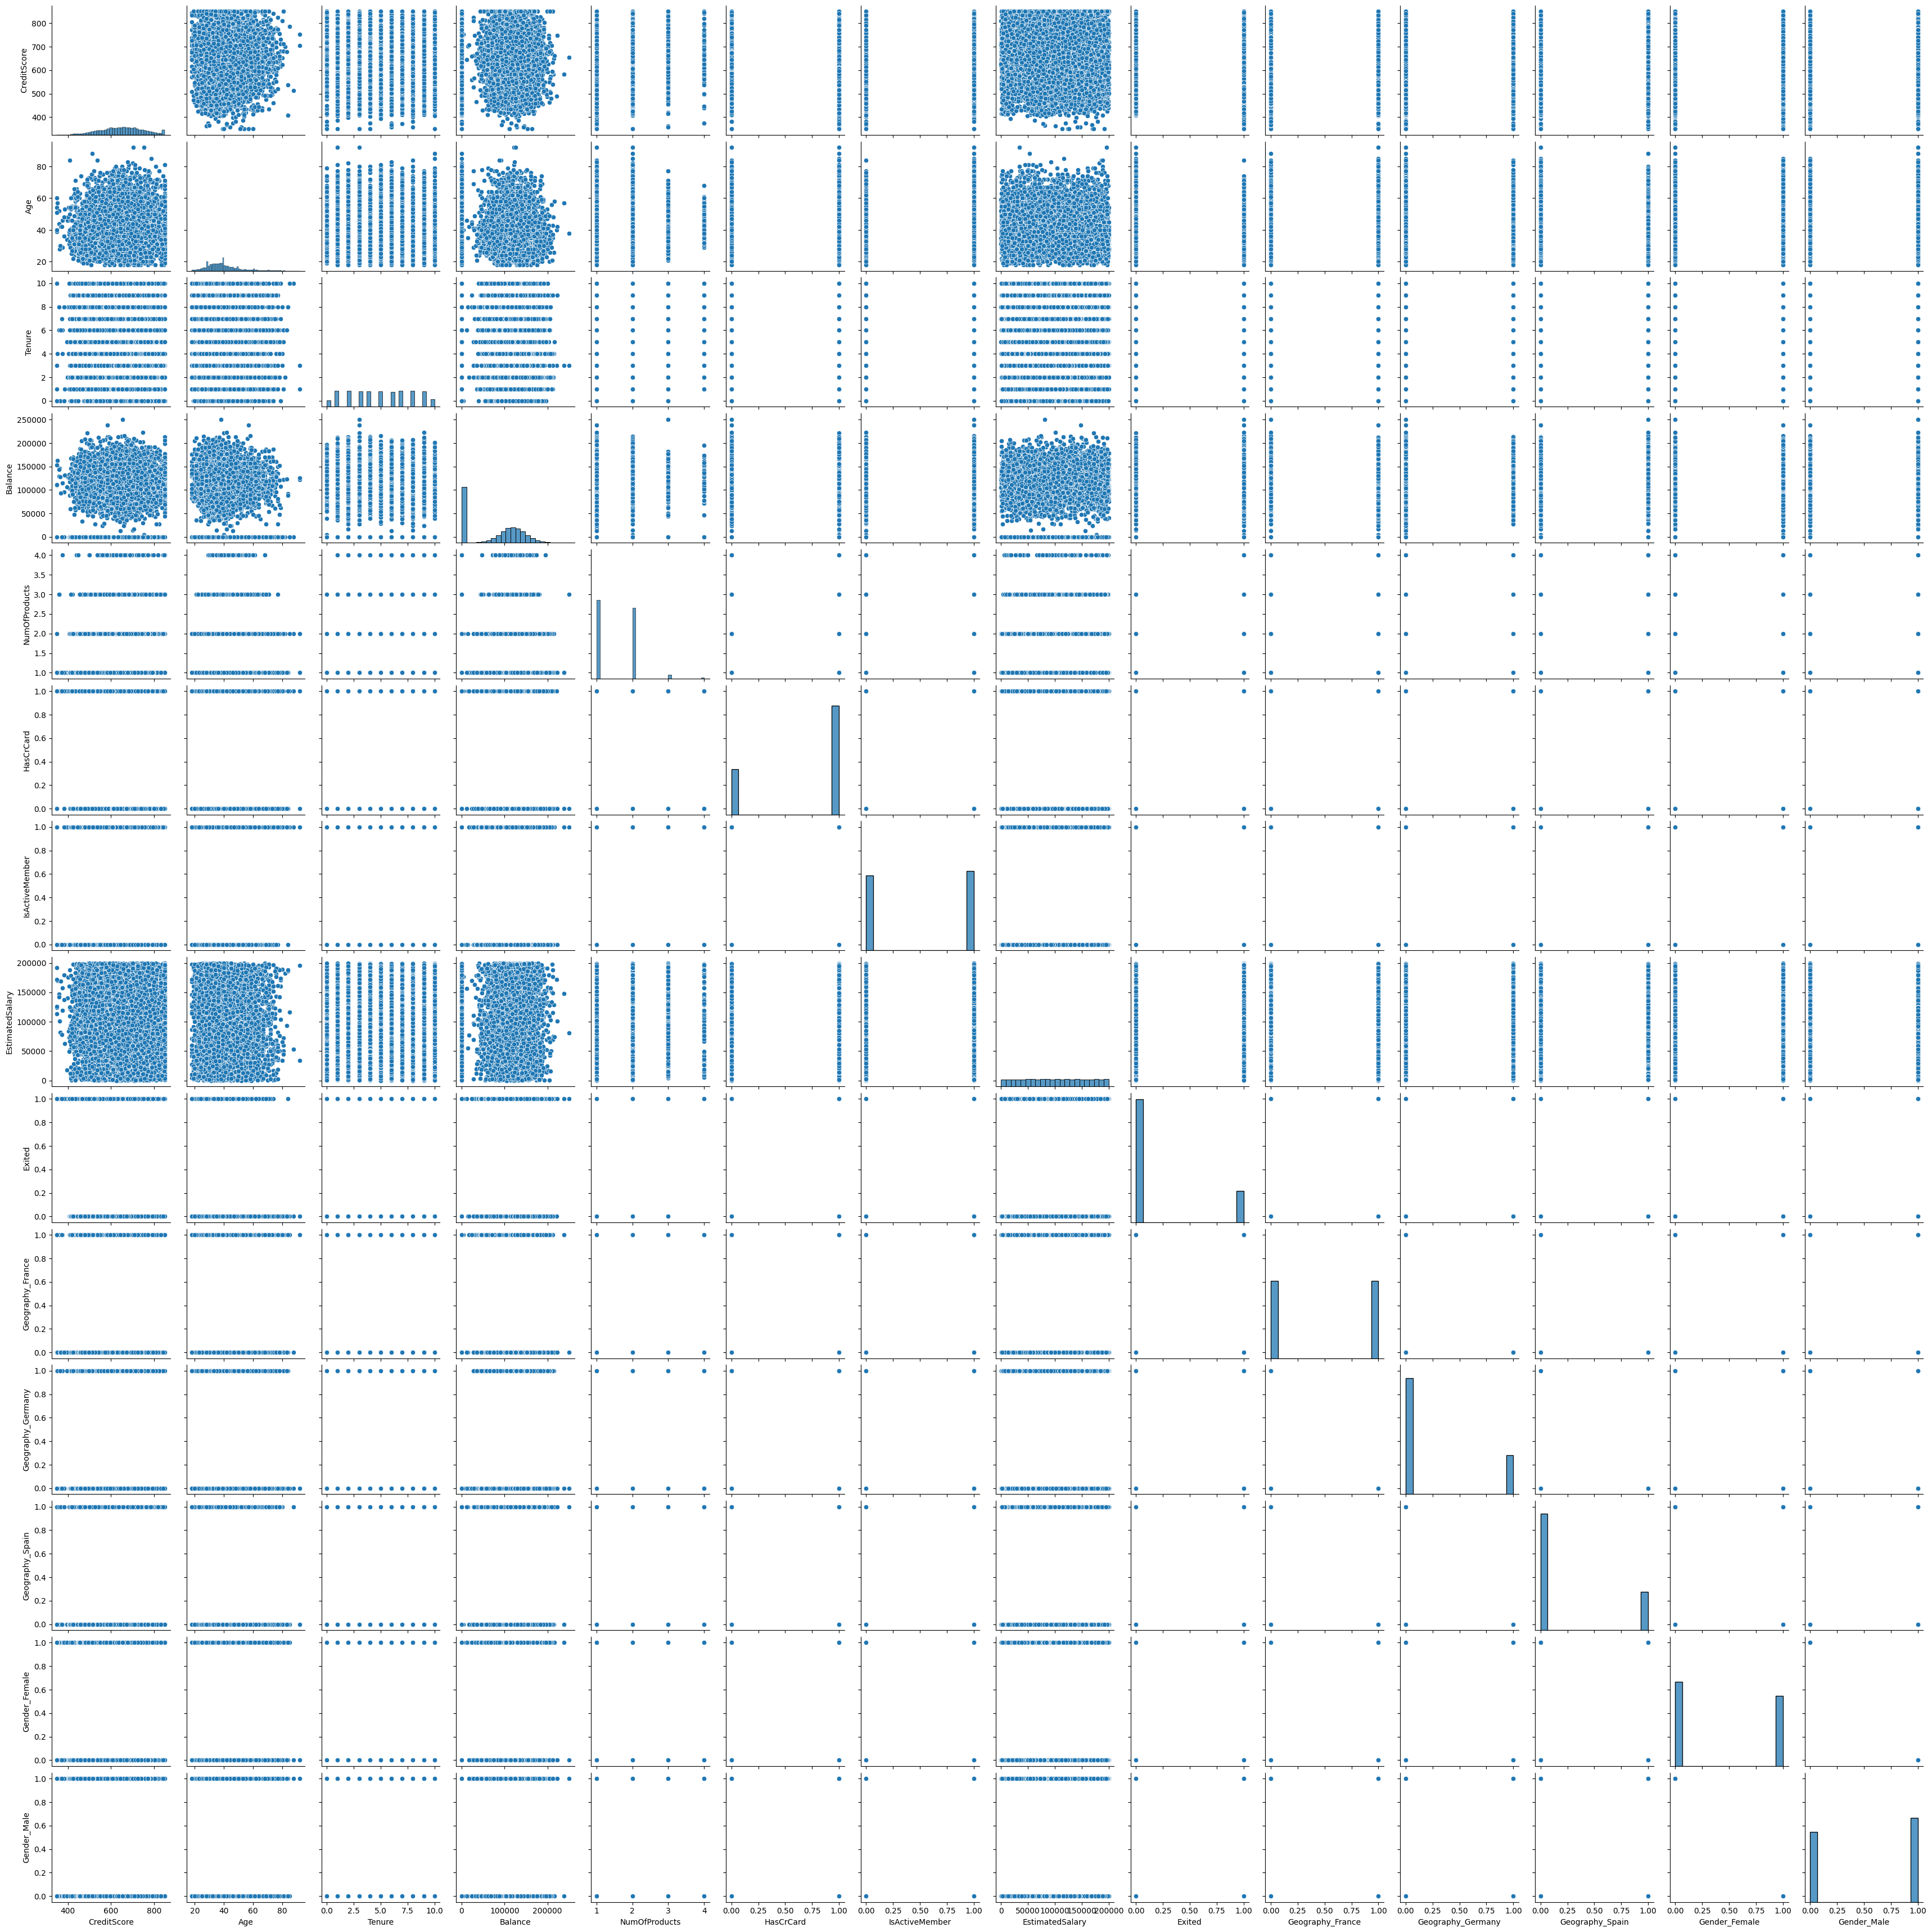

In [22]:
sns.pairplot(custDf);

In [23]:
custDf.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


<Axes: >

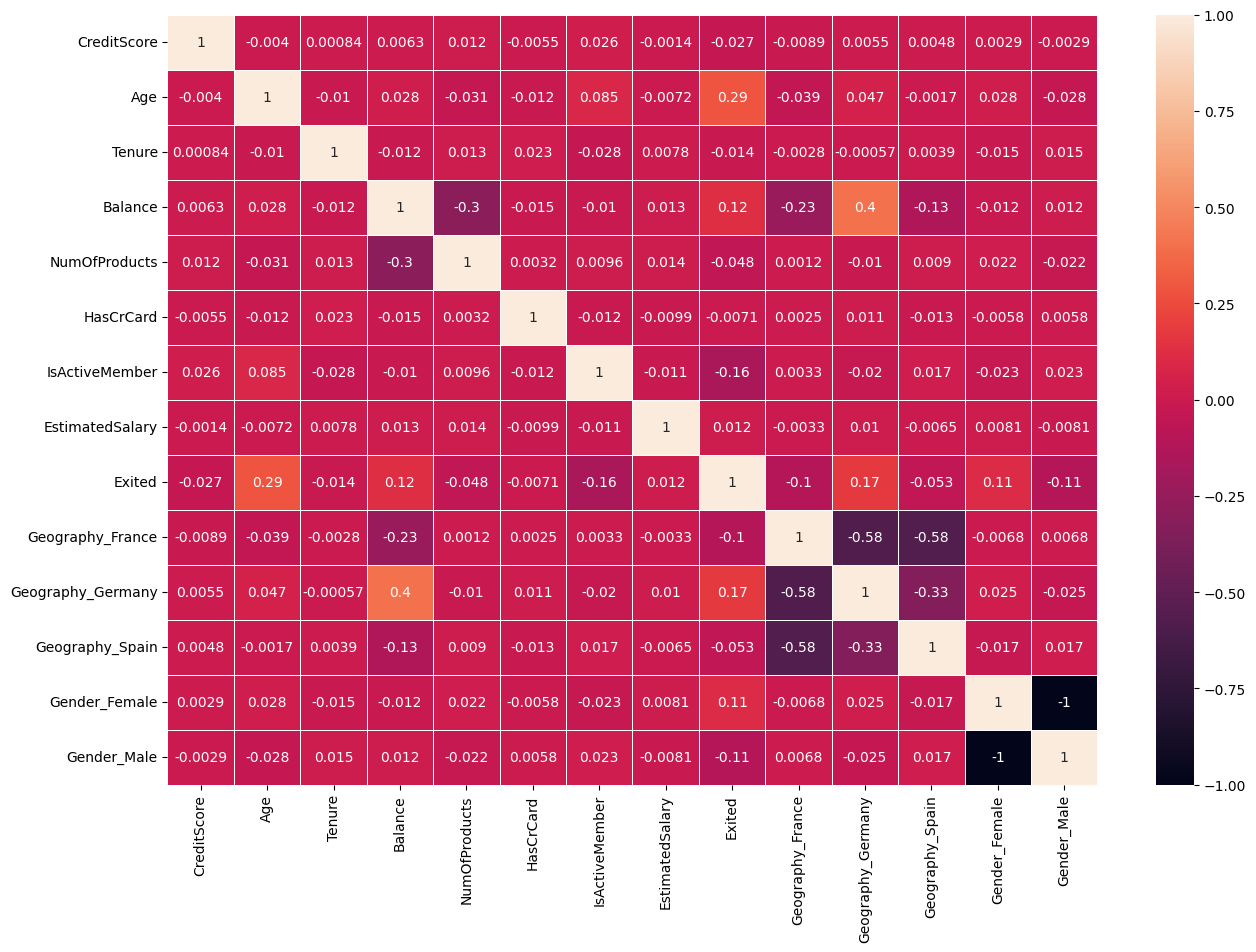

In [24]:
plot.figure(figsize = (15,10))
sns.heatmap(custDf.corr(), annot=True, linewidths=0.5)

In [25]:
X = custDf.drop('Exited',axis=1)
Y = custDf.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 5)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2926,510,63,8,0.00,2,1,1,115291.86,True,False,False,False,True
4634,610,45,3,0.00,1,1,0,38276.84,False,False,True,True,False
416,487,61,5,110368.03,1,0,0,11384.45,False,True,False,True,False
6369,646,38,2,0.00,2,0,0,178752.73,True,False,False,True,False
7952,746,33,2,107868.14,2,1,1,146192.40,False,True,False,True,False


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
modelResults = []

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score

def EvalModel(classifier,model):

    # Predict with 0.5 as threshold value
    y_predict = classifier.predict(X_test)
    y_predict = (y_predict>= 0.5)

    # Print classification report
    print("")
    print("----------------------------------------------------------------------------------")
    from sklearn.metrics import classification_report
    print(classification_report(Y_test.astype('int'), y_predict.astype('int')))
    print("----------------------------------------------------------------------------------")

    # Print accuracy score
    print("")
    accScore    = accuracy_score(y_predict.astype('int'),Y_test.astype('int'))
    recallScore = recall_score(y_predict.astype('int'),Y_test.astype('int'))
    print("Accuracy = ",accScore)
    print("Recall   = ",recallScore)
    res = (accScore, recallScore, classifier, model, y_predict)
    modelResults.append(res)


In [29]:
nn_classifier_1 = Sequential()

nn_classifier_1.add(Dense(units = 16, activation = 'relu',input_dim = 13))
nn_classifier_1.add(Dense(units = 12, activation = 'tanh'))
nn_classifier_1.add(Dense(units = 1,  activation = 'sigmoid'))
nn_classifier_1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model_1=nn_classifier_1.fit(X_train, Y_train ,validation_split=0.33, batch_size = 10, epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7837 - loss: 0.5231 - val_accuracy: 0.8044 - val_loss: 0.4667
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7891 - loss: 0.4659 - val_accuracy: 0.8170 - val_loss: 0.4480
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7982 - loss: 0.4538 - val_accuracy: 0.8222 - val_loss: 0.4379
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7957 - loss: 0.4499 - val_accuracy: 0.8230 - val_loss: 0.4317
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8027 - loss: 0.4397 - val_accuracy: 0.8252 - val_loss: 0.4271
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8095 - loss: 0.4289 - val_accuracy: 0.8239 - val_loss: 0.4249
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8286 - loss: 0.4031 - val_accuracy: 0.8269 - val_loss: 0.4207
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8104 - loss: 0.4266 - val_accu

In [30]:
EvalModel(nn_classifier_1,model_1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2403
           1       0.68      0.47      0.56       597

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

----------------------------------------------------------------------------------

Accuracy =  0.851
Recall   =  0.6802884615384616


In [32]:
from tensorflow.keras import optimizers
nn_classifier_2 = Sequential()

nn_classifier_2.add(Dense(units = 15, activation ='relu',input_dim = 13))
nn_classifier_2.add(Dense(units = 10, activation ='relu'))
nn_classifier_2.add(Dense(units = 1,  activation ='sigmoid'))

# Change 'lr' to 'learning_rate'
opt = optimizers.Adam(learning_rate = 0.001)
nn_classifier_2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
model_2 =nn_classifier_2.fit(X_train, Y_train ,validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7038 - loss: 0.5825 - val_accuracy: 0.7992 - val_loss: 0.4674
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4488 - val_accuracy: 0.8243 - val_loss: 0.4201
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4123 - val_accuracy: 0.8403 - val_loss: 0.3925
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8365 - loss: 0.3877 - val_accuracy: 0.8490 - val_loss: 0.3728
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8449 - loss: 0.3799 - val_accuracy: 0.8602 - val_loss: 0.3584
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3595 - val_accuracy: 0.8589 - val_loss: 0.3511
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3570 - val_accuracy: 0.8598 - val_loss: 0.3468
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3564 - val_accuracy: 0.8659

In [33]:
EvalModel(nn_classifier_2,model_2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2403
           1       0.62      0.50      0.56       597

    accuracy                           0.84      3000
   macro avg       0.75      0.71      0.73      3000
weighted avg       0.83      0.84      0.83      3000

----------------------------------------------------------------------------------

Accuracy =  0.841
Recall   =  0.6244813278008299


In [34]:
modelResults

[(0.851,
  0.6802884615384616,
  <Sequential name=sequential, built=True>,
  array([[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]])),
 (0.841,
  0.6244813278008299,
  <Sequential name=sequential_2, built=True>,
  array([[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]))]

In [35]:
nn_classifier_3 = Sequential()

nn_classifier_3.add(Dense(units = 20, activation ='relu',input_dim = 13))
nn_classifier_3.add(Dense(units = 12, activation ='tanh'))
nn_classifier_3.add(Dense(units = 6, activation  ='relu'))
nn_classifier_3.add(Dense(units = 1,  activation ='sigmoid'))

nn_classifier_3.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model_3=nn_classifier_3.fit(X_train, Y_train ,validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6617 - loss: 0.6258 - val_accuracy: 0.7988 - val_loss: 0.5135
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7845 - loss: 0.5122 - val_accuracy: 0.7988 - val_loss: 0.4809
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7988 - loss: 0.4666 - val_accuracy: 0.8018 - val_loss: 0.4615
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8052 - loss: 0.4403 - val_accuracy: 0.8074 - val_loss: 0.4481
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8125 - loss: 0.4383 - val_accuracy: 0.8109 - val_loss: 0.4387
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4313 - val_accuracy: 0.8135 - val_loss: 0.4318
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4246 - val_accuracy: 0.8209 - val_loss: 0.4263
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8162 - loss: 0.4138 - val_accuracy: 0.8239

In [36]:
EvalModel(nn_classifier_3,model_3)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2403
           1       0.64      0.50      0.56       597

    accuracy                           0.84      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.83      0.84      0.84      3000

----------------------------------------------------------------------------------

Accuracy =  0.8446666666666667
Recall   =  0.6414686825053996


In [37]:
# Find model with better score
bestModelRecallScore = 0.0
bestModel = ()
for p in modelResults:
    if(p[1] > bestModelRecallScore):
        bestModelRecallScore = p[1]
        bestModel = p




In [38]:
# Summary of the best model
print(bestModel[2].summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


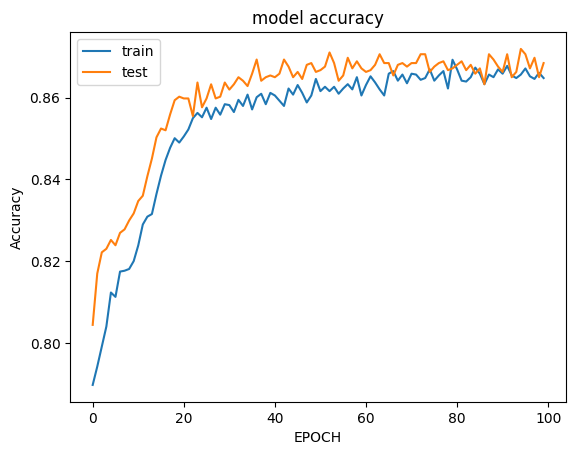

In [39]:
bestModel[3].history.keys()
plot.plot(bestModel[3].history['accuracy'])
plot.plot(bestModel[3].history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('EPOCH')
plot.legend(['train', 'test'], loc='upper left')
plot.show()

In [40]:
print("Accuracy of best model = ",bestModel[0])
print("Recall   of best model = ",bestModel[1])

Accuracy of best model =  0.851
Recall   of best model =  0.6802884615384616
